In [1]:
import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

#Maximize (delta+gamma -theta) while chossing strike

In [119]:
print('Hey! Welcome to Strategy Choosing Program. Please enter your preferences')
print('Are you bullish?:Enter B\nIf bearish:Enter BE\nExpect Underlying to be range bound?:Enter R\nIf Expect Either Side Large Moves?:Enter MN')

Hey! Welcome to Strategy Choosing Program. Please enter your preferences
Are you bullish?:Enter B
If bearish:Enter BE
Expect Underlying to be range bound?:Enter R
If Expect Either Side Large Moves?:Enter MN


In [114]:
#Maximize (delta+gamma -theta) while chossing strike
#LS -> Lower strike 
#spot -> Spot price 
#HS -> Higher strike
#hsp -> Higher strike Premium
#lsp -> Lower strike Premium

class Strategy():
    def __init__(self, LS, spot, HS, hsp, lsp): 
        def round_spot(spot):
            if spot%100>50:
                spot -= (spot%100)
                spot += 100
            else:
                spot -= spot%100
            return spot
        
        self.spot = round_spot(spot)
        self.LS = LS
        self.HS = HS
        self.premium1 = hsp
        self.premium2 = lsp
        self.market_expiry = [expiry for expiry in range(self.spot-1500, self.spot+1500, 100)]
        deviation = [(expiry-spot)/spot*100 for expiry in self.market_expiry]
        self.lsdf = pd.DataFrame({'market_expiry':self.market_expiry, 'mx_%deviation':deviation})
        
    def long_strangle(self):
        print(f"Buy OTM {self.HS} CE, Buy OTM {self.LS} PE")
        ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff      
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        maxloss = self.premium1 + self.premium2
        lower_breakeven = self.LS - maxloss
        upper_breakeven = self.HS + maxloss
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def short_strangle(self):
        print(f"Sell OTM {self.HS} CE, Sell OTM {self.LS} PE")
        ce_payoff = [(self.premium1 - max(expiry - self.HS, 0 )) for expiry in self.market_expiry]
        pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        maxprofit = self.premium1 + self.premium2
        lower_breakeven = self.LS - maxprofit
        upper_breakeven = self.HS + maxprofit
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxProfit:{maxprofit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def long_straddle(self):
        print(f"Buy ATM {self.HS} CE, Buy ATM {self.LS} PE")
        ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        maxloss = self.premium1 + self.premium2
        lower_breakeven = self.LS - maxloss
        upper_breakeven = self.HS + maxloss
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def short_straddle(self):
        print(f"Sell ATM {self.HS} CE, Sell ATM {self.LS} PE")
        ce_payoff = [(self.premium1 - max(expiry - self.HS, 0 )) for expiry in self.market_expiry]
        pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['ce_payoff'] = ce_payoff
        self.lsdf['pe_payoff'] = pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.ce_payoff + self.lsdf.pe_payoff
        maxprofit = self.premium1 + self.premium2
        lower_breakeven = self.LS - maxprofit
        upper_breakeven = self.HS + maxprofit
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxProfit:{maxprofit}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def bull_put_spread(self):
        print(f"Buy OTM {self.LS} PE, Sell ITM {self.HS} PE")
        hs_pe_payoff = [(self.premium1 - max(self.HS - expiry, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(max(self.LS - expiry, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff   
        maxprofit = self.premium1 - self.premium2
        spread = self.HS - self.LS
        maxloss =   spread - maxprofit
        breakeven = self.HS - maxprofit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def bull_call_spread(self):
        print(f"Buy ITM {self.LS} CE, Sell OTM {self.HS} CE")
        hs_pe_payoff = [(self.premium1 - max(expiry - self.HS, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(max(expiry - self.LS, 0 ) - self.premium2) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff   
        spread = self.HS - self.LS
        net_credit = self.premium1 - self.premium2
        maxprofit = spread + net_credit
        maxloss =   net_credit
        breakeven = self.HS - maxprofit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def bear_put_spread(self):
        print(f"Buy ITM {self.HS} PE, Sell OTM {self.LS} PE")
        hs_pe_payoff = [(max(self.HS - expiry, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_pe_payoff = [(self.premium2 - max(self.LS - expiry, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff
        spread = self.HS - self.LS
        maxloss =   self.premium2 - self.premium1
        maxprofit = spread + maxloss        
        breakeven = self.HS + maxloss       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def bear_call_spread(self):
        print(f"Buy OTM {self.HS} CE, Sell ITM {self.LS} CE")
        hs_ce_payoff = [(max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_ce_payoff = [(self.premium2 - max(expiry - self.LS, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_ce_payoff'] = hs_ce_payoff
        self.lsdf['itm_ce_payoff'] = ls_ce_payoff        
        lsdf['strategy_payoff'] = self.lsdf.otm_ce_payoff + self.lsdf.itm_ce_payoff        
        spread = self.HS - self.LS
        maxprofit =   self.premium2 - self.premium1
        maxloss = spread - maxprofit        
        breakeven = self.LS + maxprofit       
        print(f'Breakeven_point:{breakeven}\nMaxProfit:{maxprofit}\nMaxLoss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    
    def call_ratio_back_spread(self):
        print(f"Buy 2 OTM {self.HS} CE, Sell ITM {self.LS} CE")
        hs_ce_payoff = [(2*max(expiry - self.HS, 0 ) - self.premium1) for expiry in self.market_expiry]
        ls_ce_payoff = [(self.premium2 - max(expiry - self.LS, 0 ) ) for expiry in self.market_expiry]
        self.lsdf['otm_ce_payoff'] = hs_ce_payoff
        self.lsdf['itm_ce_payoff'] = ls_ce_payoff
        lsdf['strategy_payoff'] = self.lsdf.otm_ce_payoff + self.lsdf.itm_ce_payoff       
        net_credit = self.premium2 - self.premium1
        spread = self.HS - self.LS
        maxloss = spread - net_credit
        lower_breakeven = self.LS + net_credit
        upper_breakeven = self.HS + maxloss
        
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'],self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
        
    def put_ratio_back_spread(self):
        print(f"Buy 2 OTM {self.LS} PE, Sell ITM {self.HS} PE")
        hs_pe_payoff = [(self.premium1 - max(self.HS - expiry, 0 ) ) for expiry in self.market_expiry]
        ls_pe_payoff = [(2*max(self.LS - expiry, 0 ) - self.premium2 ) for expiry in self.market_expiry]
        self.lsdf['otm_pe_payoff'] = ls_pe_payoff
        self.lsdf['itm_pe_payoff'] = hs_pe_payoff
        self.lsdf['strategy_payoff'] = self.lsdf.otm_pe_payoff + self.lsdf.itm_pe_payoff
        
        net_credit = self.premium1 - self.premium2
        spread = self.HS - self.LS
        maxloss = spread - net_credit
        lower_breakeven = self.LS - maxloss
        upper_breakeven = self.LS + maxloss
        
        print(f'Breakeven_points:{(lower_breakeven, upper_breakeven)}\nMaxloss:{maxloss}')
        print(self.lsdf)
        plt.plot(self.lsdf['market_expiry'], self.lsdf['strategy_payoff'])
        plt.axhline(y=0, color='r', linestyle='-')
    

Buy ITM 17400 CE, Sell OTM 17500 CE
Breakeven_point:17483
MaxProfit:17
MaxLoss:-83
    market_expiry  mx_%deviation  otm_pe_payoff  itm_pe_payoff  \
0           15900      -8.620690           -325            242   
1           16000      -8.045977           -325            242   
2           16100      -7.471264           -325            242   
3           16200      -6.896552           -325            242   
4           16300      -6.321839           -325            242   
5           16400      -5.747126           -325            242   
6           16500      -5.172414           -325            242   
7           16600      -4.597701           -325            242   
8           16700      -4.022989           -325            242   
9           16800      -3.448276           -325            242   
10          16900      -2.873563           -325            242   
11          17000      -2.298851           -325            242   
12          17100      -1.724138           -325            

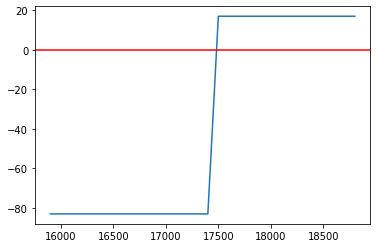

In [115]:
if __name__ == '__main__':
    s = Strategy(17400, 17400, 17500, 242, 325)
    df = s.bull_call_spread()
    print(df)
    
    
    